# highlight line

In [1]:
import cooler
import pandas as pd
import pyBigWig
import trackc as tc

In [2]:
gene_bed12 = pd.read_table('../../trackc_data/tutorials/4C/Homo_sapiens.GRCh38.105.chr.bed13', header=None)
gene_bed12 = gene_bed12[gene_bed12[12]=="protein_coding"]
gene_bed12[0] = 'chr' + gene_bed12[0]

AML_1360 = cooler.Cooler('../../trackc_data/tutorials/4C/GSM4604287_1360.sub.cool')
AML_1360_H3K27ac = pyBigWig.open('../../trackc_data/tutorials/bigwig/GSM4604189_H3K27ac.bw')


maxrange: 10 minrange: 1.0


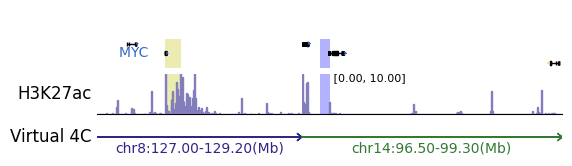

In [3]:
ten = tc.tenon(figsize=(6, 0.75))
ten.add(pos='bottom', height=0.5, hspace=0.1)
ten.add(pos='bottom', height=0.7, hspace=0.1)
ten.add(pos='bottom', height=0.6, hspace=0.1)

regions = ['chr8:127000000-129200000', 'chr14:96500000-99300000']
MYC_TSS = 'chr8:127735434-127735435'

tc.pl.gene_track(ax=ten.axs(0), bed12=gene_bed12, regions=regions, line=3, gene_fontszie=10, show_label=['MYC'])
tc.pl.bw_track(AML_1360_H3K27ac, ten.axs(1), regions=regions, maxrange=10, label='H3K27ac', binsize=10000, invert_y=False)

tc.pl.virtual4C(ax=ten.axs(2), clr=AML_1360, target=MYC_TSS, contact_regions=regions, maxrange=10,
                target_color='tab:red', track_type='line', label='Virtual 4C')

tc.pl.multi_scale_track(ten.axs(2), regions=regions, scale_adjust='Mb', intervals=1, tick_rotation=0, tick_fontsize=10)

light_regions=['chr8:127735434-127900000', 'chr14:96700000-96800000']
tc.pl.vhighlight(axs=[ten.axs(0), ten.axs(1)], 
                 colors=['y', 'b'], alpha=0.3,
                 regions=regions, light_regions=light_regions)

# tc.savefig('trackc_vhighlight.pdf')